<a href="https://colab.research.google.com/github/gmazzitelli/be-a-citizen-scientist/blob/master/BeACitizenScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GET data from local file with autentication




In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
!ls "/content/drive/My Drive/Colab Notebooks"
import pandas as pd
csv_file = "/content/drive/My Drive/Colab Notebooks/_Be a Data Scientist a #IJF19 (Responses) - Form Responses 1.csv"
df = pd.read_csv(csv_file)
df.head()

# GET data from URL
Carica il file del questionario dalla URL (shared readeable file)
buona refence [link text](https://michaelsaruggia.com/python-per-data-science-pandas/)

In [0]:
import numpy as np
import pandas as pd
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=19zCRezCS3yIy6_Igzex2sotnNja2Ks57RonGX8W2R8I&output=csv"
df = pd.read_csv(url_csv_file).replace(np.nan, 'nessuna risposta', regex=True)
df.head()

# Look into data

In [0]:
df.info()

In [0]:
df.describe()

In [0]:
print(df['Cittadinanza'].value_counts())
print(df['Sei nato in Italia?'].value_counts())

# example of dataset visualizzation

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Sesso'].value_counts().plot(kind='pie')
plt.show()  
df['Sesso'].value_counts()


istogramma... 
l'ordine prescelto per una visulizzazione semplice e' in base a gli entries (che falsa la visulizzazione)

In [0]:
df['Età in anni compiuti'].value_counts().plot(kind='bar')
plt.show()  
 

data are index in ASCI oder and must be reindex 

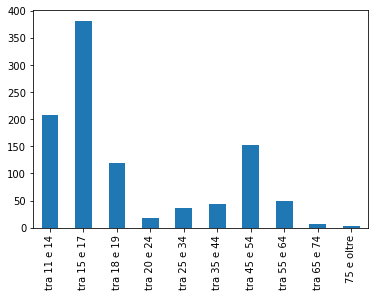

In [5]:
ordine_eta = ['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19',
       'tra 20 e 24', 'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54',
       'tra 55 e 64', 'tra 65 e 74', '75 e oltre']
df['Età in anni compiuti'].value_counts().reindex(ordine_eta).plot(kind='bar')
plt.show() 

In [0]:
cat_eta = pd.Categorical(df['Età in anni compiuti'], 
                     categories=ordine_eta, 
                     ordered=True)
cat_eta.value_counts().plot(kind='bar')
plt.show()

per passarlo ad algorirmi di machine lenrning e' necessario indicizzarlo corretamente

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordine_eta])
eta_encoded = ordinal_encoder.fit_transform(df[['Età in anni compiuti']])

segue esempio di unsepevised machine lerning che separa in 2 cluster
dati raw

In [0]:
print(ordinal_encoder.categories_)
plt.hist(eta_encoded)
plt.show()

applichaimo una classificazione per capire le famiglie di dati separati in 2 cluster usando KMeans

In [0]:
from sklearn import cluster
import numpy as np
X = eta_encoded
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
#labels = dff.columns
labels = k_means.labels_
#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
plt.hist(X, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
plt.hist(X[labels==0], range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]),color = 'r')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ordine_eta, rotation='vertical')
plt.show()
print(ordinal_encoder.categories_[0])


# full dataset visualization

tra 15 e 17    382
tra 11 e 14    208
tra 45 e 54    152
tra 18 e 19    119
tra 55 e 64     49
tra 35 e 44     44
tra 25 e 34     36
tra 20 e 24     17
tra 65 e 74      6
75 e oltre       4
Name: Età in anni compiuti, dtype: int64


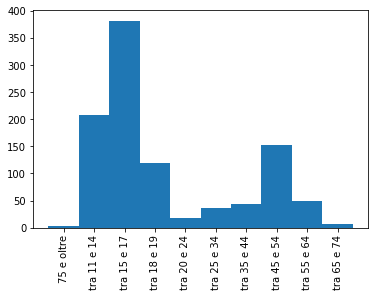

F    643
M    374
Name: Sesso, dtype: int64


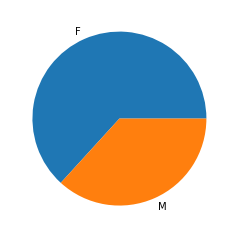

italiana    979
europea      22
altra        16
Name: Cittadinanza, dtype: int64


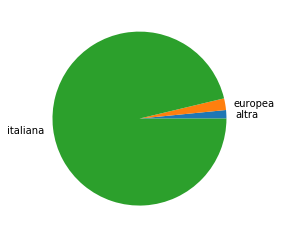

Sì                  954
nessuna risposta     40
No                   23
Name: Sei nato in Italia?, dtype: int64


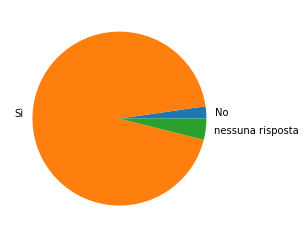

Roma                506
Varese              168
Perugia              78
nessuna risposta     61
Foggia               26
Milano               21
Napoli               13
Como                 11
Genova                9
Cosenza               9
Salerno               9
Bari                  7
Reggio Calabria       6
Monza Brianza         5
Palermo               5
Ancona                4
Brindisi              4
Catanzaro             3
Latina                3
Novara                3
Agrigento             3
Caserta               3
L'Aquila              3
Torino                3
Potenza               3
Bologna               3
Trento                2
Taranto               2
Verona                2
Siena                 2
                   ... 
Brescia               2
Padova                2
Lecce                 2
Trieste               2
Cuneo                 1
Piacenza              1
Ascoli Piceno         1
Firenze               1
Matera                1
Lucca                 1
Cremona         

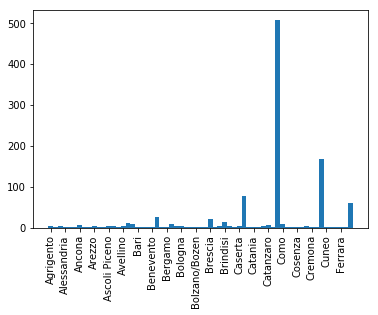

Roma                     620
Varese                   190
Perugia                   84
Como                      25
Foggia                    23
Genova                    11
Cosenza                    6
Ancona                     5
Milano                     4
Barletta-Andria-Trani      3
Palermo                    3
Bologna                    3
Latina                     3
Bari                       3
Firenze                    2
Ferrara                    2
Trieste                    2
Monza e della Brianza      2
Siena                      2
Vercelli                   2
Alessandria                2
Agrigento                  2
Rovigo                     1
Cremona                    1
Lecce                      1
Lucca                      1
Fermo                      1
Cuneo                      1
Torino                     1
Vicenza                    1
Padova                     1
Reggio Calabria            1
Udine                      1
Brescia                    1
Savona        

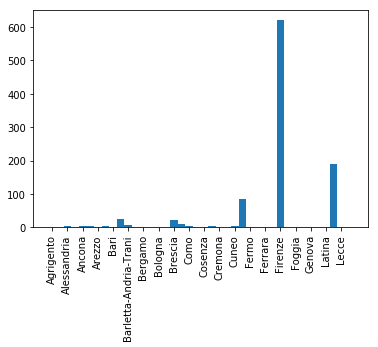

licenza di scuola secondaria di primo grado                                                                       578
laurea vecchio ordinamento                                                                                        117
scuola primaria                                                                                                   116
diploma di istituto tecnico                                                                                        53
licenza liceale                                                                                                    46
laurea magistrale biennale                                                                                         29
dottorato                                                                                                          21
laurea di primo livello                                                                                            19
diploma di istituto professionale                       

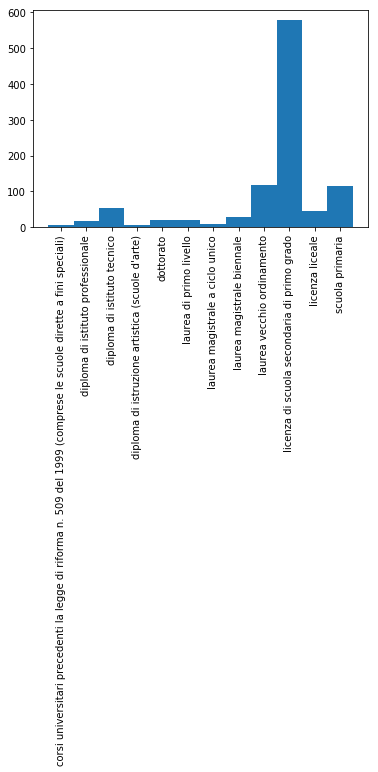

italiana    950
europea      35
altra        32
Name: Cittadinanza del padre, dtype: int64


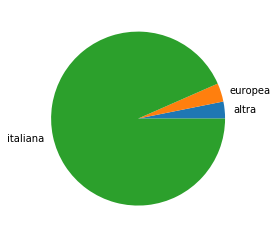

Sì                  919
nessuna risposta     69
No                   29
Name: Tuo padre è nato in Italia?, dtype: int64


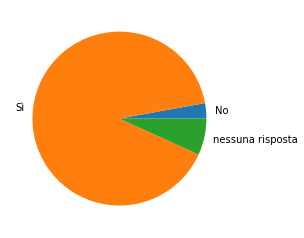

Roma                    342
Varese                  124
nessuna risposta         96
Perugia                  65
Napoli                   33
Foggia                   27
Milano                   24
Reggio Calabria          14
Salerno                  12
Frosinone                11
Palermo                  11
Cosenza                  10
Como                     10
L'Aquila                  9
Catanzaro                 9
Taranto                   8
Bari                      8
Avellino                  8
Caserta                   8
Messina                   8
Genova                    7
Latina                    7
Potenza                   6
Campobasso                6
Lecce                     6
Terni                     6
Siracusa                  5
Catania                   5
Benevento                 5
Trieste                   5
                       ... 
Crotone                   2
Treviso                   2
Sondrio                   2
Macerata                  2
Ascoli Piceno       

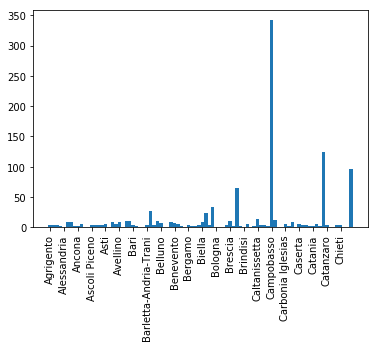

italiana    940
europea      42
altra        35
Name: Cittadinanza della madre, dtype: int64


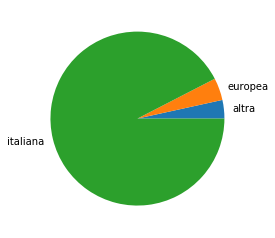

Sì                  902
nessuna risposta     79
No                   36
Name: Tua madre è nata in Italia?, dtype: int64


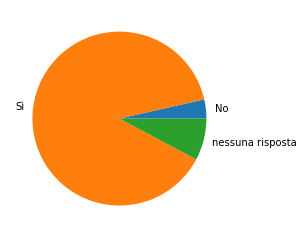

Roma                     342
Varese                   124
nessuna risposta         113
Perugia                   64
Napoli                    29
Foggia                    26
Milano                    26
Bari                      14
Cosenza                   12
Como                      11
L'Aquila                  10
Potenza                   10
Caserta                   10
Avellino                  10
Venezia                    9
Salerno                    9
Reggio Calabria            9
Catanzaro                  8
Palermo                    8
Frosinone                  8
Genova                     7
Lecce                      7
Ancona                     6
Padova                     6
Brindisi                   5
Cagliari                   5
Agrigento                  5
Torino                     4
Brescia                    4
Forlì-Cesena               4
                        ... 
Bologna                    2
Sassari                    2
Bergamo                    2
Rieti         

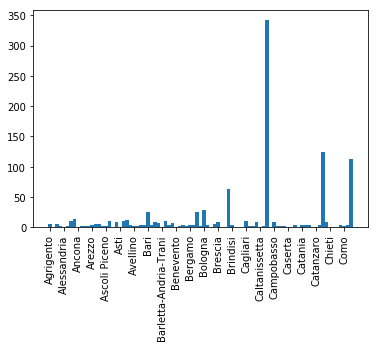

Sì    987
No     30
Name: Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?, dtype: int64


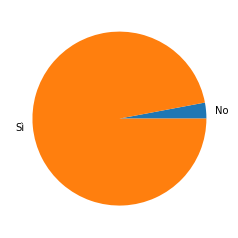

Tutti i giorni                   545
Più di due volte a settimana     324
Meno di due volte a settimana     94
nessuna risposta                  30
Meno di una volta al mese         24
Name: Negli ultimi 12 mesi quante volte hai cercato informazioni?, dtype: int64


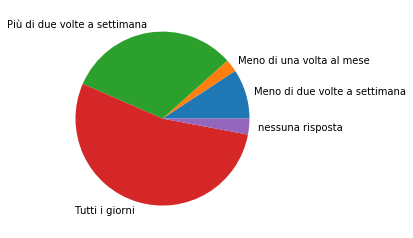

raramente                         516
mai                               257
spesso                            188
nessuna risposta                   30
sempre                             19
mai, raramente                      2
mai, raramente, spesso, sempre      2
raramente, spesso                   1
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)], dtype: int64


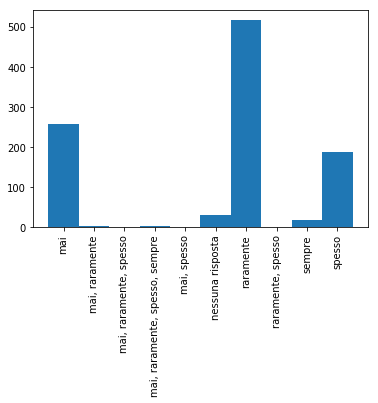

spesso                            462
raramente                         324
mai                               108
sempre                             85
nessuna risposta                   30
raramente, spesso                   3
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
spesso, sempre                      1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Tv (es. telegiornali, talkshow)], dtype: int64


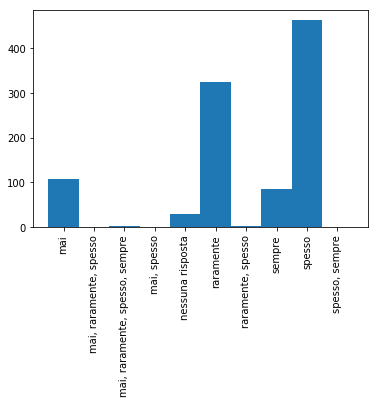

raramente                         393
mai                               338
spesso                            210
sempre                             36
nessuna risposta                   30
mai, raramente                      5
mai, raramente, spesso, sempre      2
raramente, spesso                   1
mai, raramente, spesso              1
spesso, sempre                      1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Radio (es. giornaleradio)], dtype: int64


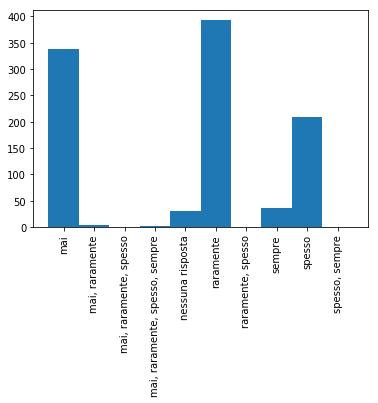

spesso                            563
raramente                         260
sempre                            118
nessuna risposta                   30
mai                                30
raramente, spesso                   7
spesso, sempre                      3
mai, spesso                         2
mai, raramente, spesso, sempre      2
mai, raramente                      1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Persone (amici, scuola, famiglia)], dtype: int64


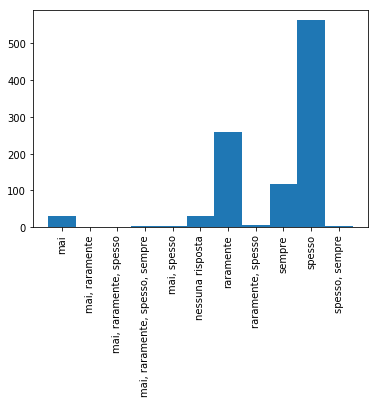

sempre                            622
spesso                            329
nessuna risposta                   30
raramente                          19
mai                                 7
spesso, sempre                      4
mai, raramente, spesso, sempre      2
mai, sempre                         1
mai, spesso                         1
mai, spesso, sempre                 1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Internet], dtype: int64


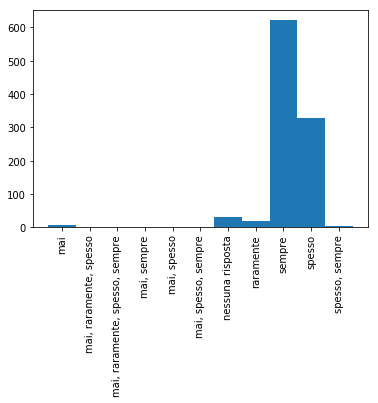

mai                               423
raramente                         373
spesso                            133
sempre                             41
nessuna risposta                   30
mai, raramente                      7
raramente, spesso                   6
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, raramente, spesso              1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Altro], dtype: int64


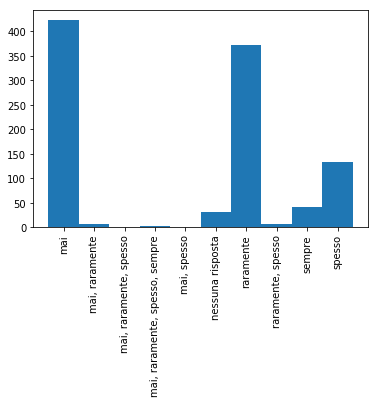

Internet            828
Carta                52
Persone              52
Tv                   35
nessuna risposta     30
Altro                11
Radio                 9
Name: Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare? , dtype: int64


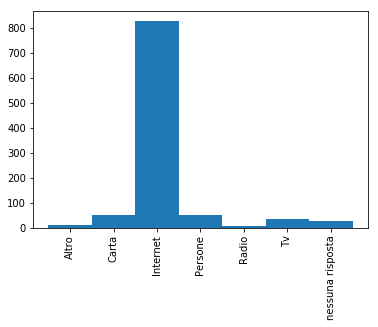

circa 30 minuti      432
meno di 10 minuti    315
circa 1 ora          158
più di un'ora         82
nessuna risposta      30
Name: Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?, dtype: int64


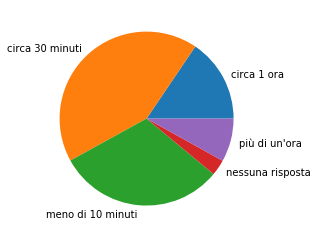

terrorismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori             153
altro                                                                                  84
catastrofi naturali                                                                    75
bullismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori                71
terrorismo, violenze e/o abusi sui minori, catastrofi naturali                         67
terrorismo                                                                             64
terrorismo, catastrofi naturali                                                        61
terrorismo, violenze e/o abusi sulle donne, catastrofi naturali                        60
violenze e/o abusi sulle donne, violenze e/o abusi sui minori, catastrofi naturali     50
violenze e/o abusi sulle donne, violenze e/o abusi sui minori                          41
violenze e/o abusi sui minori                                                          31
nessuna ri

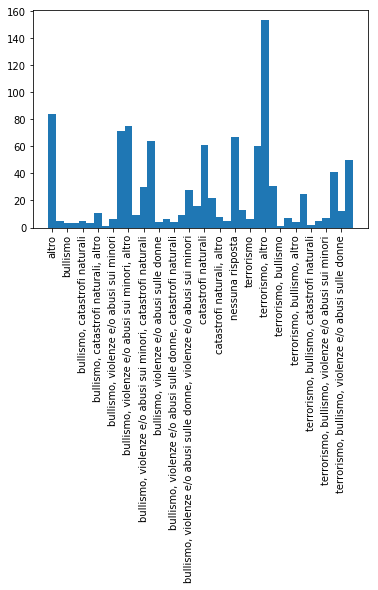

settimanalmente     380
mensilmente         273
giornalmente        172
praticamente mai    162
nessuna risposta     30
Name: Con che frequenza ti informi su argomenti riguardanti la scienza?, dtype: int64


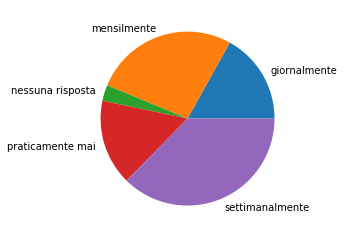

nessuna risposta                                                   192
astronomia, curiosità scientifiche, tecnologia, innovazione         42
medicina, curiosità scientifiche, tecnologia, innovazione           39
medicina, ecologia/clima, tecnologia, innovazione                   39
ecologia/clima, curiosità scientifiche, tecnologia, innovazione     35
medicina, ecologia/clima, curiosità scientifiche                    21
tecnologia, innovazione                                             21
ecologia/clima, astronomia, tecnologia, innovazione                 20
ecologia/clima, astronomia, curiosità scientifiche                  19
medicina, curiosità scientifiche, biologia                          16
curiosità scientifiche                                              16
astronomia                                                          16
medicina                                                            15
ecologia/clima, curiosità scientifiche, biologia                    15
medici

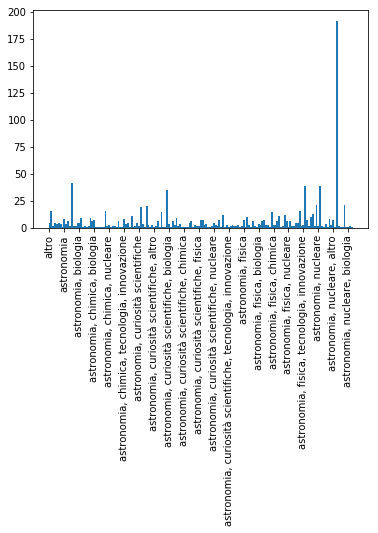

commenti e discussioni riguardo la notizia                                                                                                                                                                                                                       179
i video                                                                                                                                                                                                                                                          108
non so                                                                                                                                                                                                                                                            59
i titoli delle testate giornalistiche                                                                                                                                                                                    

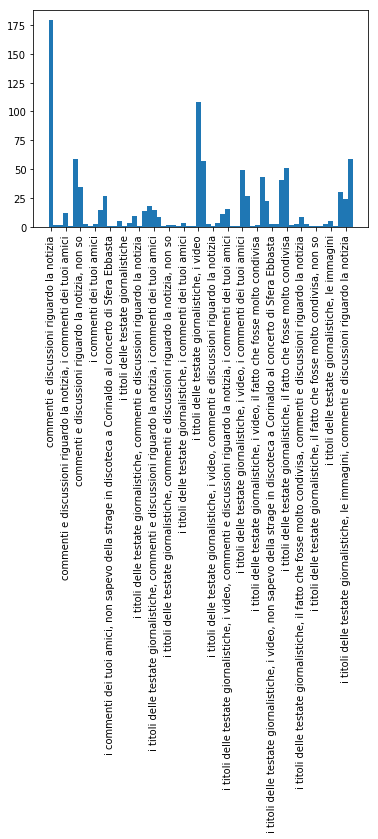

dalla tv                                                                                                                                                            542
da internet                                                                                                                                                          95
da internet, dalla tv                                                                                                                                                91
dalla tv, da una persona che ne parlava                                                                                                                              42
dalla radio                                                                                                                                                          41
da una persona che ne parlava                                                                                                                                   

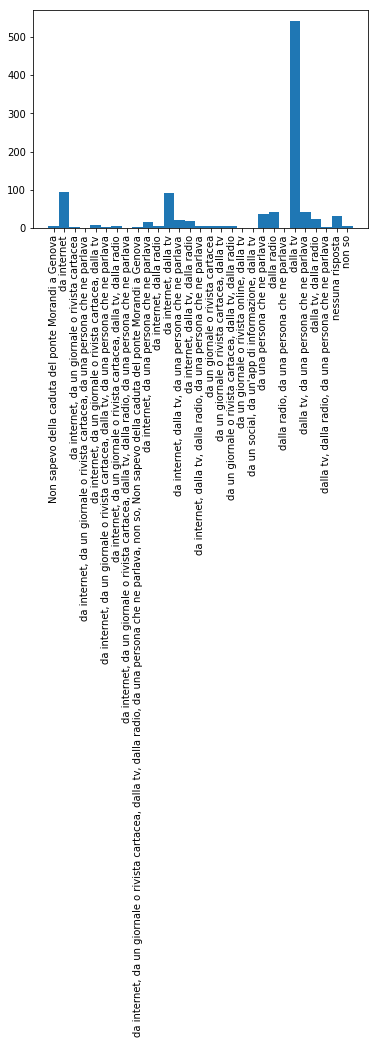

Sì                  976
nessuna risposta     30
No                   11
Name: Hai mai usato internet?, dtype: int64


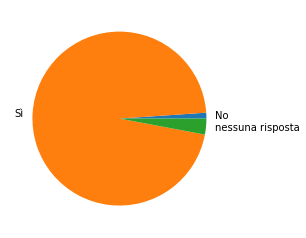

spesso                            429
raramente                         301
sempre                            140
mai                               109
nessuna risposta                   31
mai, raramente                      2
mai, raramente, spesso, sempre      2
mai, spesso                         1
raramente, spesso, sempre           1
spesso, sempre                      1
Name: Sul web, dove prendi le informazioni? [testate giornalistiche online], dtype: int64


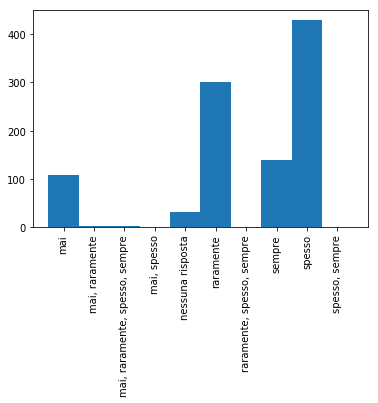

spesso                            393
raramente                         267
sempre                            176
mai                               141
nessuna risposta                   31
spesso, sempre                      3
mai, raramente                      2
mai, raramente, spesso, sempre      2
raramente, spesso                   1
raramente, spesso, sempre           1
Name: Sul web, dove prendi le informazioni? [social], dtype: int64


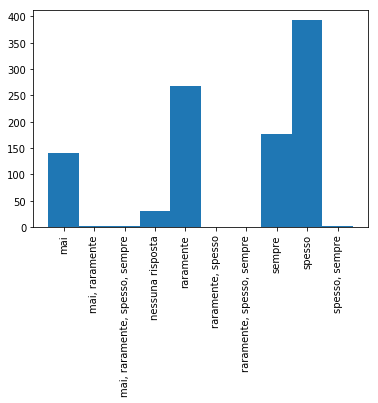

spesso                            456
sempre                            453
raramente                          49
nessuna risposta                   31
mai                                18
spesso, sempre                      5
mai, raramente, spesso, sempre      2
raramente, spesso                   1
raramente, sempre                   1
raramente, spesso, sempre           1
Name: Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping], dtype: int64


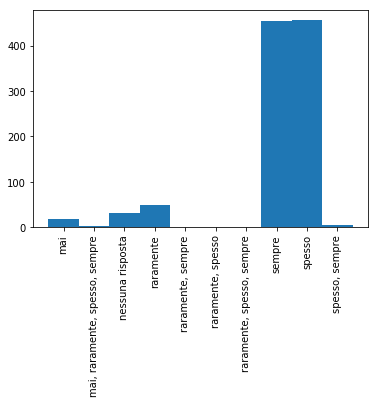

spesso                            387
raramente                         312
sempre                            147
mai                               132
nessuna risposta                   31
mai, raramente, spesso, sempre      2
spesso, sempre                      2
raramente, spesso                   1
mai, spesso                         1
mai, raramente                      1
raramente, spesso, sempre           1
Name: Sul web, dove prendi le informazioni? [siti specifici che conosco], dtype: int64


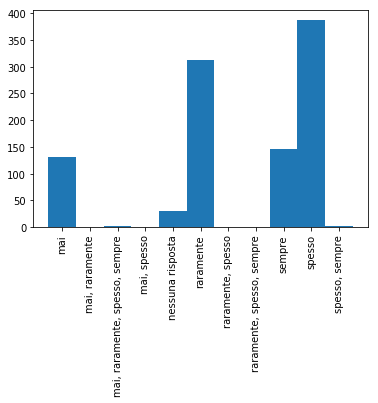

mai                               438
raramente                         323
spesso                            165
sempre                             46
nessuna risposta                   31
mai, raramente                      8
mai, raramente, spesso, sempre      2
raramente, spesso                   1
mai, sempre                         1
mai, spesso                         1
raramente, spesso, sempre           1
Name: Sul web, dove prendi le informazioni? [app dedicate], dtype: int64


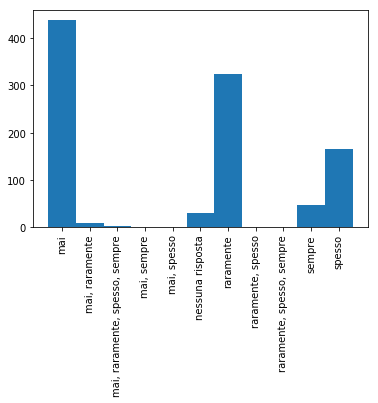

mai                               598
raramente                         245
spesso                            103
nessuna risposta                   39
sempre                             23
mai, raramente                      5
raramente, spesso                   2
mai, raramente, spesso, sempre      2
Name: Sul web, dove prendi le informazioni? [newsletter via email], dtype: int64


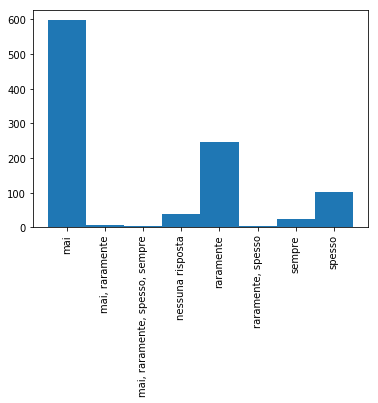

Instagram, Youtube                                                206
Altro                                                             109
Instagram                                                         103
Youtube                                                            72
Instagram, Youtube, Altro                                          61
Facebook                                                           55
Instagram, Facebook, Youtube                                       55
Facebook, Youtube                                                  44
Instagram, Facebook                                                43
Instagram, Altro                                                   33
Youtube, Altro                                                     32
nessuna risposta                                                   31
Facebook, Youtube, Altro                                           12
Facebook, Twitter                                                  11
Twitter             

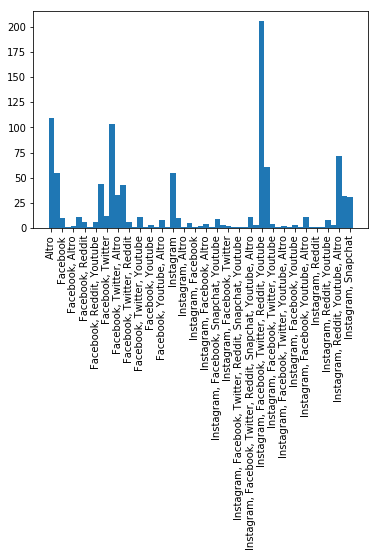

Instagram           401
Youtube             227
Altro               152
Facebook            152
Twitter              41
nessuna risposta     31
Reddit               10
Snapchat              3
Name: Tra i social che usi di più anche per informati, quale preferisci?, dtype: int64


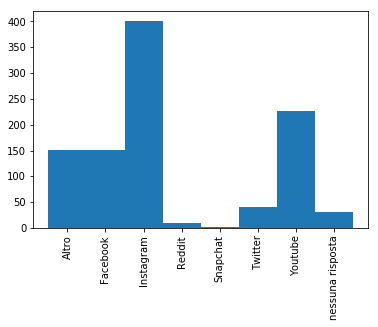

nessuna risposta                                                                                                                                                                                              31
sport, film - serie tv, musica                                                                                                                                                                                 9
altro                                                                                                                                                                                                          8
gossip, Notizie/cronaca/attualità, film - serie tv, musica, cultura (arte, cinema, teatro, storia, letteratura, libri)                                                                                         7
Notizie/cronaca/attualità, sport, scienza (scoperte scientifiche, innovazioni, approfondimenti), film - serie tv, musica                                            

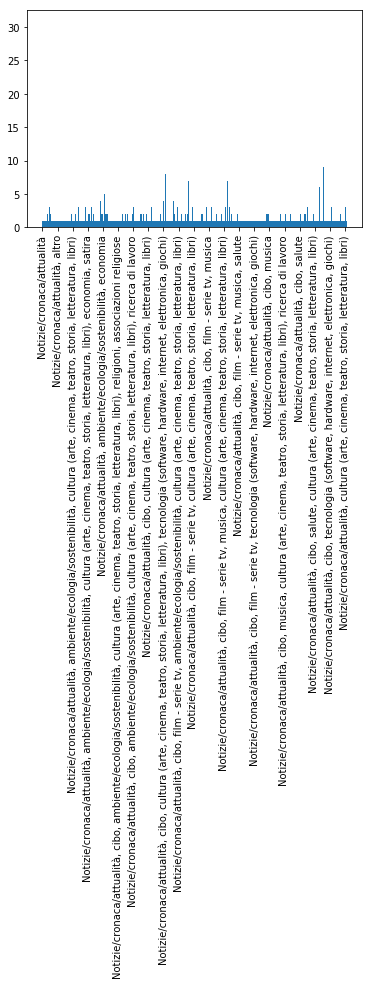

foto                269
news                227
memes               207
video               128
profili vari        118
nessuna risposta     32
like/followers       28
classifiche           8
Name: Qual è la prima cosa che vai a vedere sui social?, dtype: int64


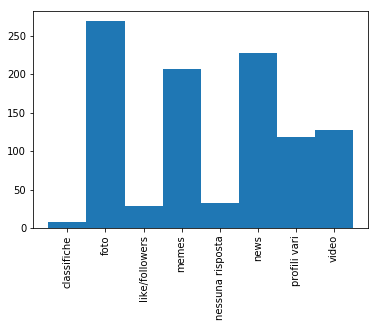

Da un motore di ricerca online (es google, bing, safari ...)                                                                                                                115
Non ne ricevo                                                                                                                                                               115
Da un'app di news (es google news, apple news...)                                                                                                                            88
Dalle Home dei social                                                                                                                                                        60
Dai video proposti su Youtube                                                                                                                                                39
Da un'app di messaggistica istantanea (WhatsApp, Messanger...)                                                          

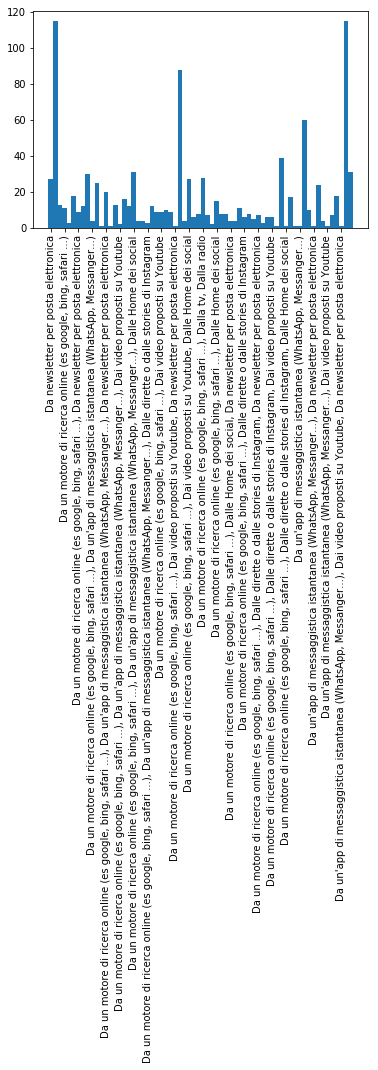

nessuna risposta                                                                                                                                                                                                    31
shopping online                                                                                                                                                                                                     29
altro                                                                                                                                                                                                               28
Notizie/cronaca/attualità                                                                                                                                                                                           22
Notizie/cronaca/attualità, shopping online                                                                                                  

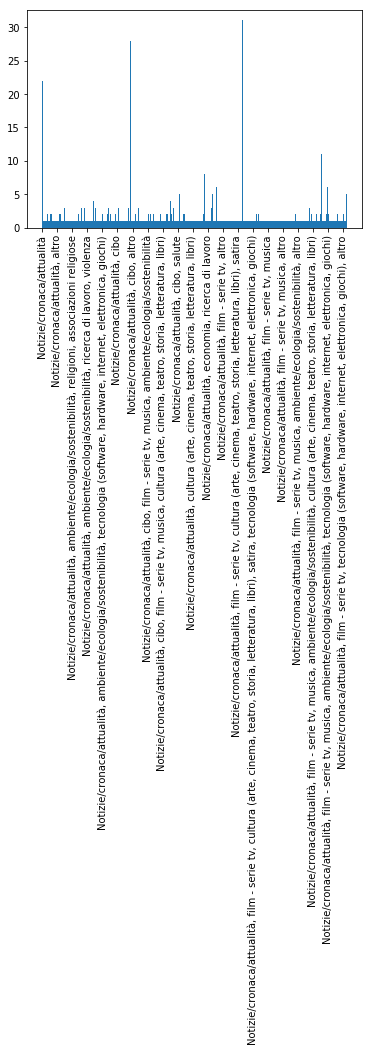

l'argomento che tratta                                                                                                                325
il titolo, l'argomento che tratta                                                                                                     148
il titolo                                                                                                                             108
il titolo, la grafica, l'argomento che tratta                                                                                          47
l'argomento che tratta, commenti e discussioni riguardo la notizia                                                                     40
la grafica, l'argomento che tratta                                                                                                     33
nessuna risposta                                                                                                                       31
la grafica                        

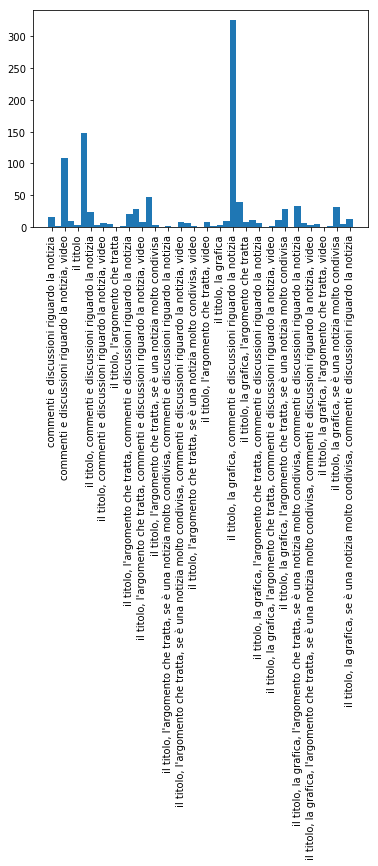

raramente           467
spesso              315
mai                 169
sempre               35
nessuna risposta     31
Name: Condividi le notizie?, dtype: int64


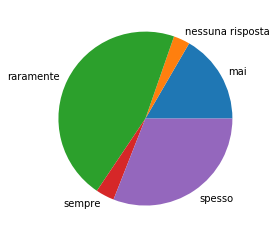

famiglia, amici più stretti                                                                                 207
nessuna risposta                                                                                            199
amici più stretti                                                                                           127
famiglia, amici più stretti, gruppi con lo stesso interesse                                                  78
tutti, attraverso post pubblici                                                                              58
famiglia                                                                                                     52
amici più stretti, gruppi con lo stesso interesse                                                            51
gruppi con lo stesso interesse                                                                               34
famiglia, amici più stretti, conoscenti                                                                 

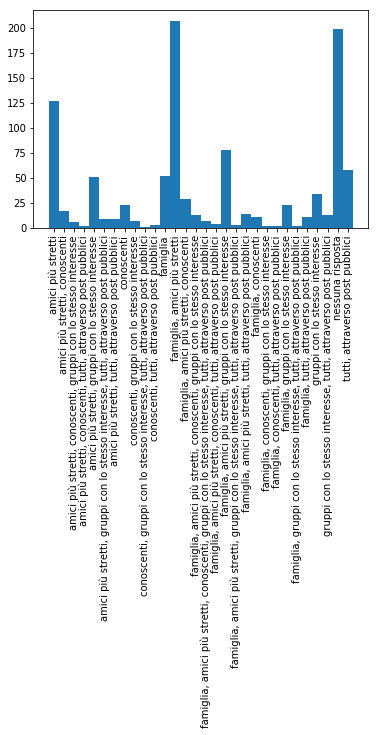

con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce                                              278
nessuna risposta                                                                                                     209
ne parlo a voce                                                                                                      153
con un'app di messaggistica istantanea (whatsapp, SMS)                                                               143
con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce, postando e commentando sui social            54
postando e commentando sui social                                                                                     53
ne parlo a voce, postando e commentando sui social                                                                    44
con un'app di messaggistica istantanea (whatsapp, SMS), postando e commentando sui social                             36
altro                           

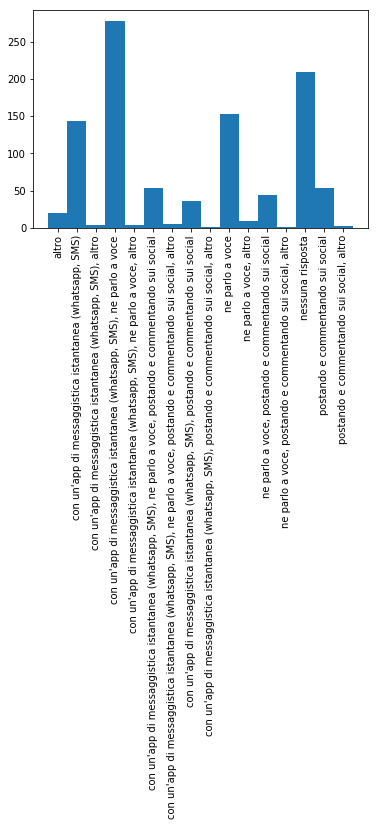

molto               371
abbastanza          369
nessuna risposta    209
poco                 55
mai per questo       13
Name: Quando condividi lo fai ...  [Perché è una notizia che mi ha impressionato], dtype: int64


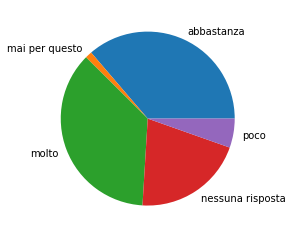

abbastanza          300
poco                264
nessuna risposta    209
mai per questo      131
molto               113
Name: Quando condividi lo fai ...  [Per farlo sapere a tutti], dtype: int64


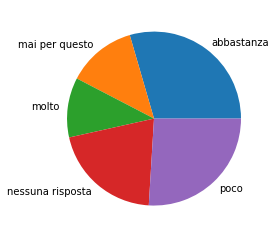

poco                283
abbastanza          278
nessuna risposta    209
mai per questo      179
molto                68
Name: Quando condividi lo fai ...  [Per commentare], dtype: int64


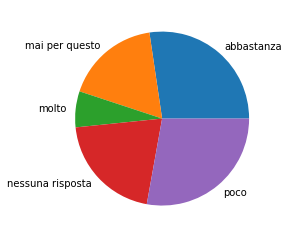

mai per questo      695
nessuna risposta    209
poco                 92
abbastanza           15
molto                 6
Name: Quando condividi lo fai ...  [Perché lo fanno tutti], dtype: int64


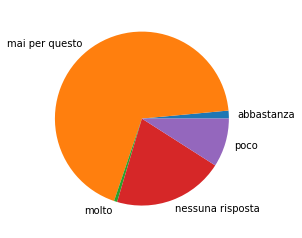

dipende dal giornale o dalla fonte    770
generalmente no                        95
generalmente si                        93
nessuna risposta                       30
non saprei/non mi interessa            29
Name: Secondo te ci si può fidare di ciò che scrivono i giornalisti?, dtype: int64


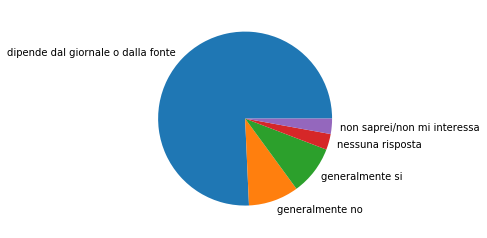

dipende dalla notizia          697
generalmente no                168
generalmente si                103
nessuna risposta                30
non saprei/non mi interessa     19
Name: Secondo te ci si può fidare delle notizie che si trovano su internet?, dtype: int64


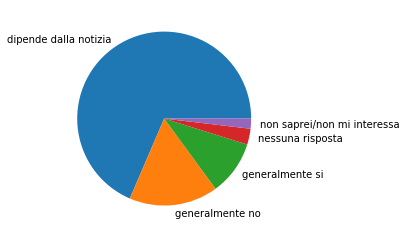

si                  343
dipende             343
no                  194
non lo so           107
nessuna risposta     30
Name: Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?, dtype: int64


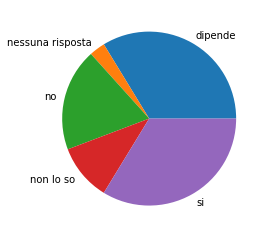

abbastanza          471
poco                298
molto               117
per niente          101
nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta], dtype: int64


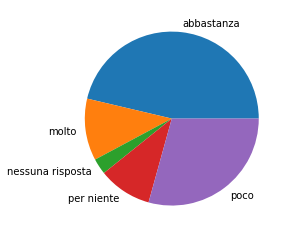

abbastanza          462
molto               407
poco                 93
nessuna risposta     30
per niente           25
Name: Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento], dtype: int64


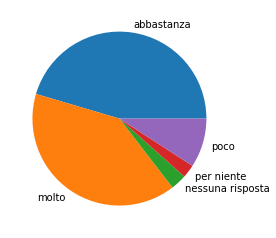

abbastanza          385
poco                357
per niente          125
molto               120
nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia], dtype: int64


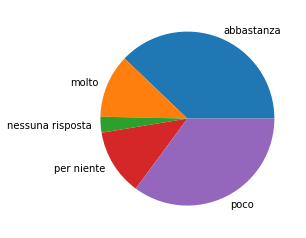

molto               446
abbastanza          417
poco                 97
nessuna risposta     30
per niente           27
Name: Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)], dtype: int64


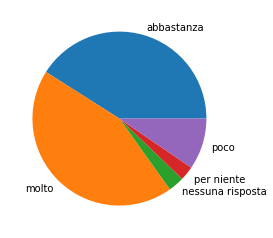

poco                418
abbastanza          289
per niente          222
molto                58
nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile], dtype: int64


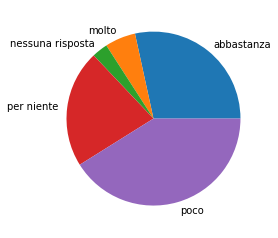

per niente          375
poco                326
abbastanza          200
molto                86
nessuna risposta     30
Name: Cosa ti fa capire se una notizia è attendibile? [altro], dtype: int64


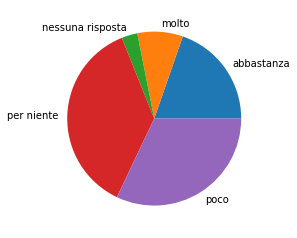

Facebook                                                                                                                                                               63
Facebook, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                                            44
Facebook, blog e siti vari, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                          40
Facebook, blog e siti vari                                                                                                                                             40
blog e siti vari                                                                                                                                                       33
nessuna risposta                                                                                                                                      

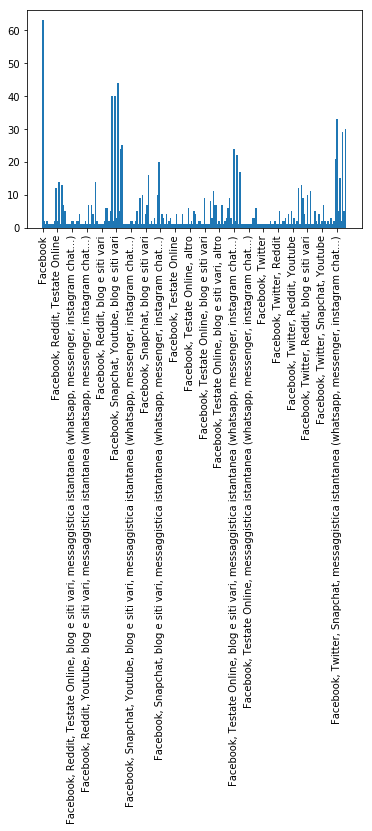

Notizie/cronaca/attualità                                                                                                                                        53
gossip                                                                                                                                                           34
Notizie/cronaca/attualità, gossip                                                                                                                                30
nessuna risposta                                                                                                                                                 30
Notizie/cronaca/attualità, politica, gossip                                                                                                                      27
Notizie/cronaca/attualità, politica                                                                                                                              21
altro           

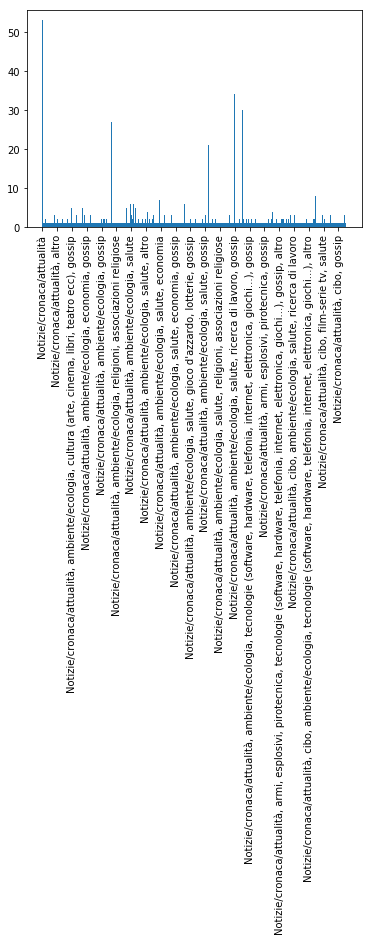

tra 15 e 20         284
tra 10 e 14         229
sopra i 50          158
tra 21 e 30         110
tra 41 e 50          94
tra 31 e 40          65
meno di 10 anni      47
nessuna risposta     30
Name: Secondo te a che età si è più inclini a condividere una fake news?, dtype: int64


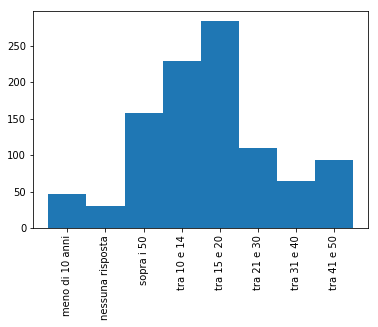

si                  494
no                  428
non mi interessa     65
nessuna risposta     30
Name: Sai cos'è la reputazione digitale?, dtype: int64


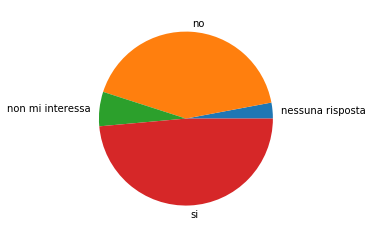

si                              874
lo so, ma non mi interessa       71
no                               34
nessuna risposta                 30
non lo so e non mi interessa      8
Name: Sai quali pericoli potrebbero esserci nel postare le foto sui social?, dtype: int64


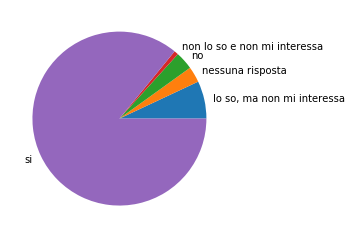

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
show_as_pie = 6
show_as_hist = 20

from sklearn.preprocessing import OrdinalEncoder
for i in range (1, len(df.columns)):
  ordinal_encoder = OrdinalEncoder()
  ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
  print (df[df.columns[i]].value_counts())
  labels = np.array(ordinal_encoder.categories_[0])
  if len(ordinal_encoder.categories_[0])<show_as_pie :
    val, _ = np.histogram(ordinated_encoded, bins=len(labels))
    plt.pie(val, labels=labels)
  else:
    cat_num = np.linspace(1,len(ordinal_encoder.categories_[0]),len(ordinal_encoder.categories_[0]))
    if len(cat_num) > show_as_hist:
      cat_num = cat_num[::len(cat_num)//show_as_hist]
      labels = labels[::len(cat_num)//show_as_hist]
    plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
    plt.xticks(cat_num-0.5,labels, rotation='vertical')
  plt.show()